In [1]:
import numpy as np
from matplotlib import pyplot as plt

# Problem 2: ODE's

We consider the following two-dimensional potential:


\begin{equation}
    \Phi (x,y) =  - \frac{1}{\sqrt{1 + \alpha x^2 + \beta y^2}}
\end{equation}

with $\alpha > 0$ and $\beta > 0$.

## Part a: Expressing the Equations of motion as coupled 1st-order equations

$ \dot{x} = v_x $

$ \dot{v}_x = -\frac{2 \alpha x}{(1 + \alpha x^2 + \beta y^2)^{3/2}} $

$ \dot{y} = v_y $

$ \dot{v}_y = -\frac{2 \beta y}{(1 + \alpha x^2 + \beta y^2)^{3/2}} $

## Part b. Solving the system with numerical integrators

In [2]:
# leapfrog (Verlet) coming soon....

In [3]:
#the fourth-order Runge-Kutta method from class:
def rk4(r_init,f,a,b,h):
    
    t_list = np.arange(a,b,h)
    r_list = list([r_init])
    r = np.array(r_init)
    
    for t in t_list:
        #defining k1, etc. according to the fourth order Runge-Kutta method
        k1 = h*np.array(f(r,t))
        k2 = h*np.array(f(r+k1/2,t+h/2))
        k3 = h*np.array(f(r+k2/2,t+h/2))
        k4 = h*np.array(f(r+k3,t+h))
        
        #continuting with defining r(t+h), same logic as Euler's...
        r = np.array(r + (k1 + 2*k2 + 2*k3 + k4)/6)
        
        r_list.append(list(r))
    #t_list= np.append(t_list,b)
    return(r_list,t_list)

In [4]:
def f(r,t,a=2,b=2):
    #in this example, we use a=b=2, but these will vary later
    x = r[0]
    vx = r[1]
    y = r[2]
    vy = r[3]
    
    return(vx, -(2*a*x)/((1 + a*x**2 + b*y**2)**(3/2)), vy, -(2*b*y)/((1 + a*x**2 + b*y**2)**(3/2)))



In [5]:
#solutions for varying step sizes
soln1 = rk4([1,0,0,0.1],f,0,100,1)
soln2 = rk4([1,0,0,0.1],f,0,100,0.5)
soln3 = rk4([1,0,0,0.1],f,0,100,0.25)
soln4 = rk4([1,0,0,0.1],f,0,100,0.1)


Text(0.5, 1.0, 'h = 1')

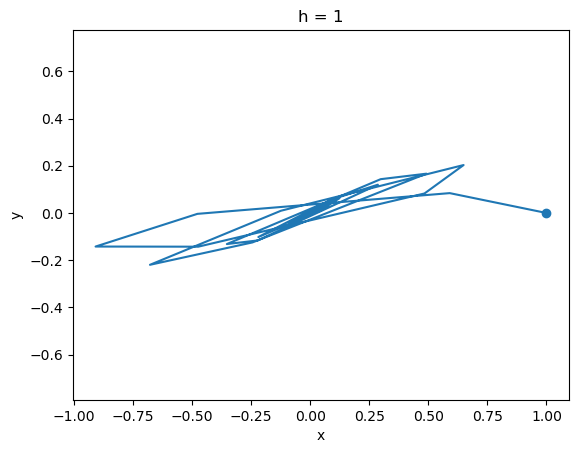

In [6]:
#first plot
r,t = soln1
x_list = []
y_list = []
for i in r:
    x_list.append(i[0])
    y_list.append(i[2])

plt.plot(x_list,y_list)
plt.scatter(x_list[0],y_list[0]) #starting point
plt.axis('equal')
plt.xlabel('x')
plt.ylabel('y')
plt.title('h = 1')

Text(0.5, 1.0, 'h = 0.5')

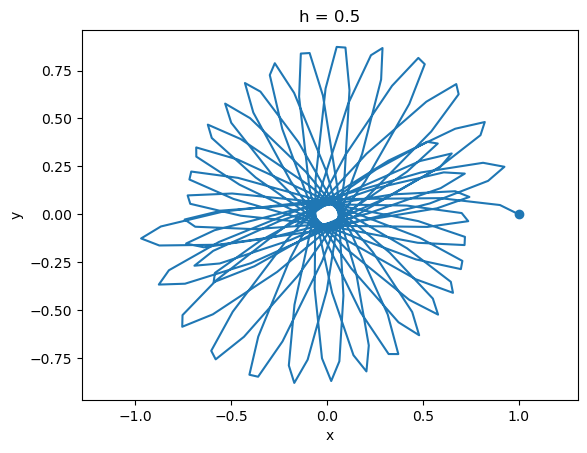

In [7]:
#second plot
r,t = soln2
x_list = []
y_list = []
for i in r:
    x_list.append(i[0])
    y_list.append(i[2])

plt.plot(x_list,y_list)
plt.scatter(x_list[0],y_list[0]) #starting point
plt.axis('equal')
plt.xlabel('x')
plt.ylabel('y')
plt.title('h = 0.5')

Text(0.5, 1.0, 'h = 0.25')

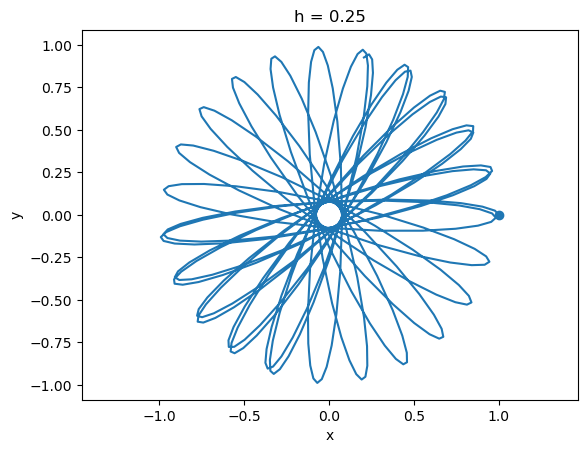

In [8]:
#third plot
r,t = soln3
x_list = []
y_list = []
for i in r:
    x_list.append(i[0])
    y_list.append(i[2])

plt.plot(x_list,y_list)
plt.scatter(x_list[0],y_list[0]) #starting point
plt.axis('equal')
plt.xlabel('x')
plt.ylabel('y')
plt.title('h = 0.25')

Text(0.5, 1.0, 'h = 0.1')

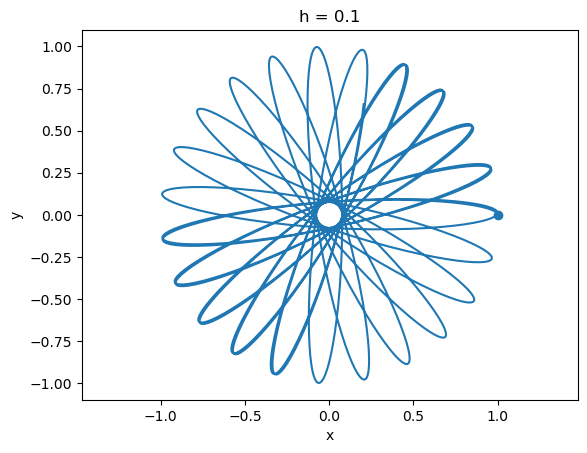

In [9]:
#fourth plot
r,t = soln4
x_list = []
y_list = []
for i in r:
    x_list.append(i[0])
    y_list.append(i[2])

plt.plot(x_list,y_list)
plt.scatter(x_list[0],y_list[0]) #starting point
plt.axis('equal')
plt.xlabel('x')
plt.ylabel('y')
plt.title('h = 0.1')

## Part c: Energy Considerations

In [10]:
def Energy(r,a,b):
    return(1/2 * (r[1]**2 + r[3]**2) - 1/np.sqrt(1 + a*r[0]**2 + b*r[2]**2))

Text(0.5, 1.0, 'h = 1')

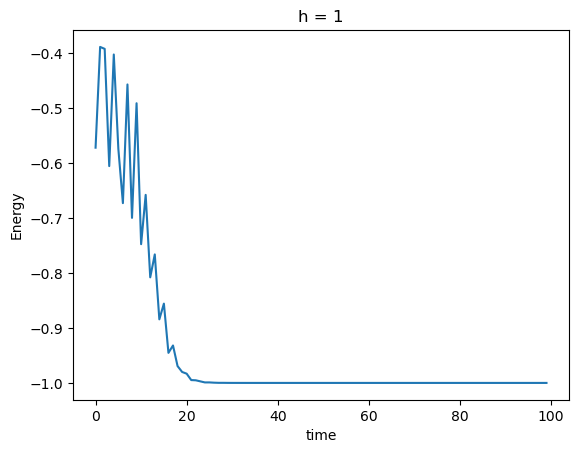

In [11]:
#first plot
r,t = soln1

x_points = []
for i in range(len(t)):
    x_points.append(Energy(r[i],2,2))
    
plt.plot(t,x_points)
plt.xlabel('time')
plt.ylabel("Energy")
plt.title('h = 1')

Text(0.5, 1.0, 'h = 0.5')

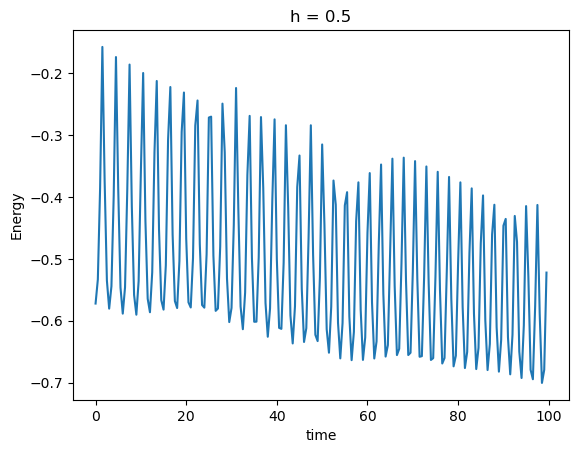

In [12]:
#second plot
r,t = soln2

x_points = []
for i in range(len(t)):
    x_points.append(Energy(r[i],2,2))
    
plt.plot(t,x_points)
plt.xlabel('time')
plt.ylabel("Energy")
plt.title('h = 0.5')

Text(0.5, 1.0, 'h = 0.25')

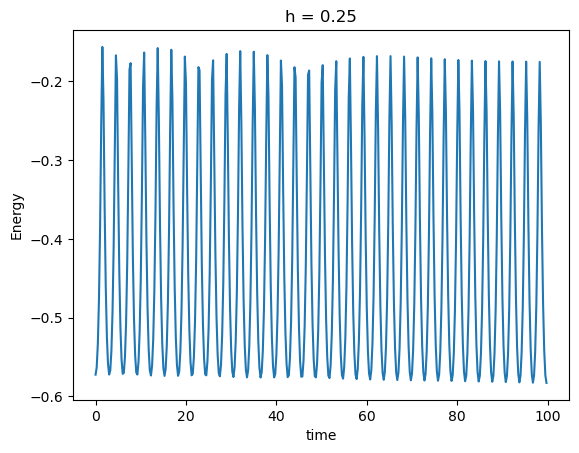

In [13]:
#third plot
r,t = soln3

x_points = []
for i in range(len(t)):
    x_points.append(Energy(r[i],2,2))
    
plt.plot(t,x_points)
plt.xlabel('time')
plt.ylabel("Energy")
plt.title('h = 0.25')

Text(0.5, 1.0, 'h = 0.1')

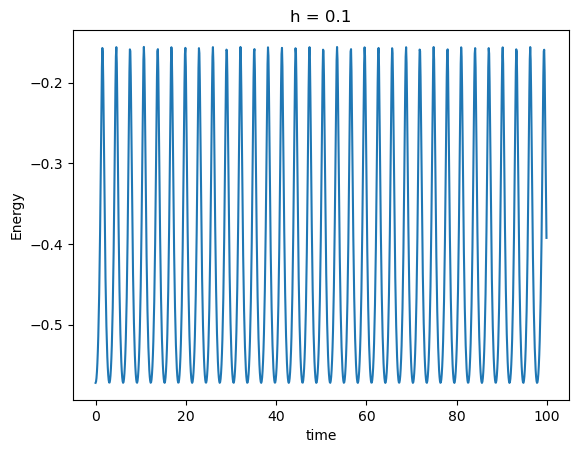

In [14]:
#fourth plot
r,t = soln4

x_points = []
for i in range(len(t)):
    x_points.append(Energy(r[i],2,2))
    
plt.plot(t,x_points)
plt.xlabel('time')
plt.ylabel("Energy")
plt.title('h = 0.1')

### Energy Comment:

I would have expected the energy evolution to be about the same as h got smaller, but with a 'smoother' function. However, as h got smaller, the energy evolution was entirely different for each h!

## Part d: Effect of $\alpha$ and $\beta$:

Text(0.5, 1.0, 'h = 0.1')

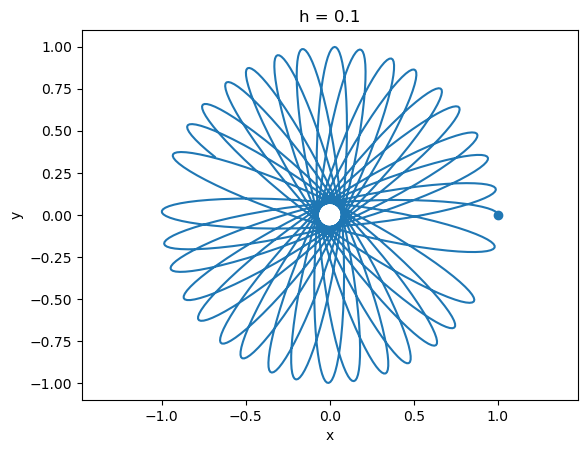

In [33]:
def f2(r,t,a=3,b=3):
    return(f(r,t,a=a,b=b))

soln = rk4([1,0,0,0.1],f2,0,100,0.1)

r,t = soln
x_list = []
y_list = []
for i in r:
    x_list.append(i[0])
    y_list.append(i[2])

plt.plot(x_list,y_list)
plt.scatter(x_list[0],y_list[0]) #starting point
plt.axis('equal')
plt.xlabel('x')
plt.ylabel('y')
plt.title('h = 0.1')

### $\alpha$ and $\beta$ comment:

The parameters $\alpha$ and $\beta$ effect the result of the ODE solution. If a = b, the solution exhibits a sort of 'radial' symmetry as the solution moves about the origin. If a != b, the solution is compressed in one direction or another. Higher a and b seem to make the solution oscillate faster.

## Some testing to see different x and y plots...

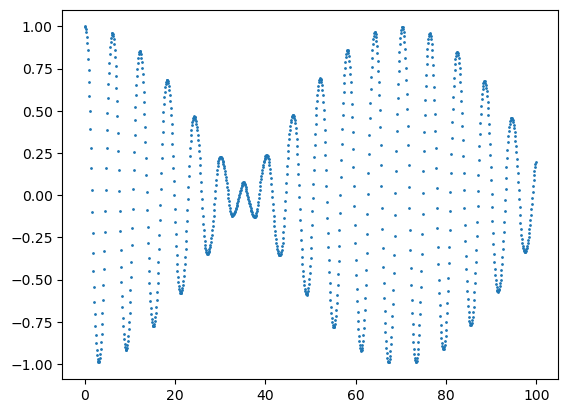

In [15]:
plt.scatter(t,x_list[0:-1],s=1)

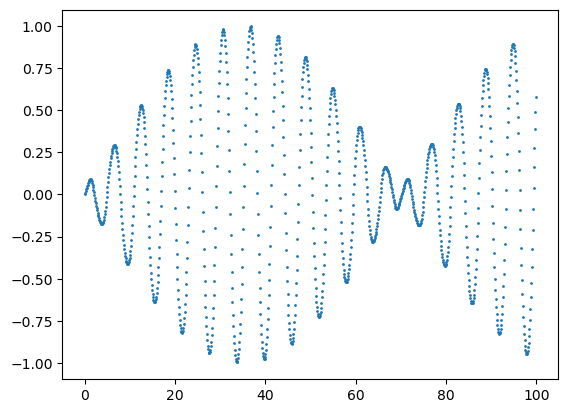

In [16]:
plt.scatter(t,y_list[0:-1],s=1)

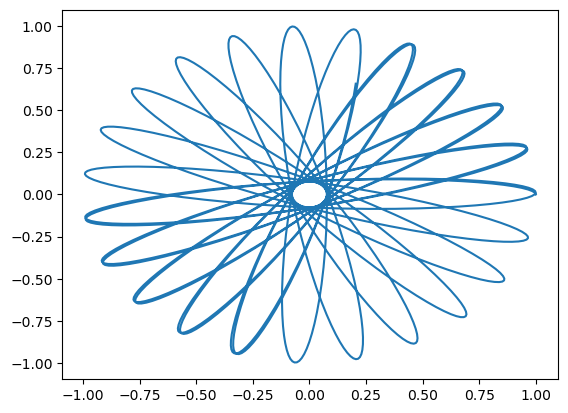

In [17]:
plt.plot(x_list,y_list)